# Time Series Analysis and Forecasting
Analysing the series to predict Future value from Previous observed value based on time and which value need to be predicted

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [13]:
df = pd.read_csv("airline_passengers.csv",index_col='Month')

# Month "YYYY-MM-DD" is index value in the Time Series Analysis
df

,Thousands of Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1960-08,606
1960-09,508
1960-10,461


## It is Quantitave and Single Variet Problem

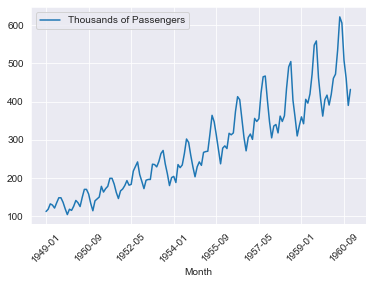

In [14]:
sns.set_style('darkgrid')
df.plot(rot='45')
plt.show()

### Whether this data have Seasonality, Irregularity  or trend or not

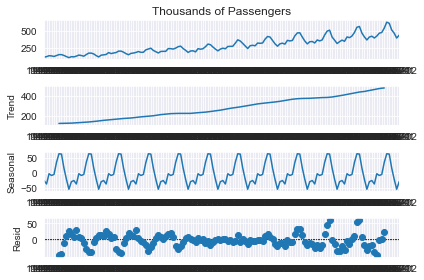

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Thousands of Passengers'],period=12)
decomposition.plot()
plt.show()

### The data is going in upward trend and within the years some seasonality pattern exist.
Because Linearly increasing line with some up & down patterns (Seasonality). This is the perfect example of Time series analysis.
#### ASK is to predict for next 5 Year

In [16]:
from statsmodels.tsa.stattools import adfuller
adfuller(df['Thousands of Passengers'])

(0.8153688792060543,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

 Adfuller test is to check whether my series is staionary or not

 If not use LAG method to do so.


In [17]:
def adf_check(tsa_data):
     labels = ['ADF-value','p_value','LAG-value','#of Obseravations']
     result = adfuller(tsa_data)
     for i,j in zip(result,labels):
          print(f"{j}: {i}")
     # evidence is enough or not for significant
     if result[1]<=0.05:
          print(f"Strong Evidence against null Hypothesis & my TimeSeries is Stationary")
     else:
          print(f"Weak evidence against null Hypothesis & Not Stationary")

adf_check(df['Thousands of Passengers'])


ADF-value: 0.8153688792060543
p_value: 0.9918802434376411
LAG-value: 13
#of Obseravations: 130
Weak evidence against null Hypothesis & Not Stationary


In [18]:
df['1st Shift'] = df['Thousands of Passengers']-df['Thousands of Passengers'].shift(1)
adf_check(df['1st Shift'].dropna())

ADF-value: -2.8292668241700034
p_value: 0.054213290283824954
LAG-value: 12
#of Obseravations: 130
Weak evidence against null Hypothesis & Not Stationary


In [19]:
df['2nd Shift'] = df['1st Shift']-df['1st Shift'].shift(1)
adf_check(df['2nd Shift'].dropna())

ADF-value: -16.384231542468488
p_value: 2.7328918500143186e-29
LAG-value: 11
#of Obseravations: 130
Strong Evidence against null Hypothesis & my TimeSeries is Stationary


## Now Time Series Data is Stationary and can perform analysis
AIC = -2LL + K
### k= parameter = trend (p d q)/seasonality(P D Q)


In [20]:
# Create Seasonality data to check seasonality
# a seasonal data have Number of months or 12 months

df['Seasonnalaty'] = df['Thousands of Passengers']-df['Thousands of Passengers'].shift(12)
df

,Thousands of Passengers,1st Shift,2nd Shift,Seasonnalaty
Month,,,,
1949-01,112,NaN,NaN,NaN
1949-02,118,6.0,NaN,NaN
1949-03,132,14.0,8.0,NaN
1949-04,129,-3.0,-17.0,NaN
1949-05,121,-8.0,-5.0,NaN
...,...,...,...,...
1960-08,606,-16.0,-103.0,47.0
1960-09,508,-98.0,-82.0,45.0
1960-10,461,-47.0,51.0,54.0


In [21]:
# checking significance of the data
adf_check(df['Seasonnalaty'].dropna())

ADF-value: -3.3830207264924805
p_value: 0.011551493085514982
LAG-value: 1
#of Obseravations: 130
Strong Evidence against null Hypothesis & my TimeSeries is Stationary


### D/d is calculated using LAG Method
* d = 2
* D = 1

Lagging a time series means to shift its values forward one or more time steps, or equivalently, to shift the times in its index backward one or more steps.
### Use 
* acf --> Q/q
* pacf --> P/p

#### Trend have 'd' 'p' and 'q' values
#### Seasonality have 'D' 'P' and 'Q' values


In [23]:
# To Calculate P/p and Q/q values 

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

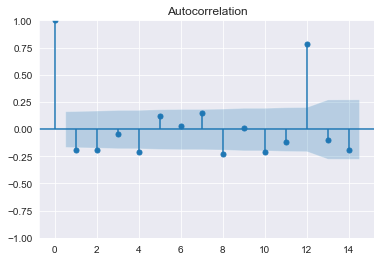

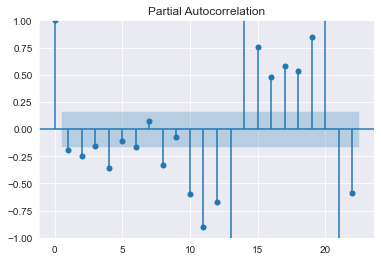

'3rd line lies in the [-0 to -0.2 ] region. 3rd line onwards'

In [34]:
# Trend
plot_acf(df['2nd Shift'].dropna(),lags=14)


plot_pacf(df['2nd Shift'].dropna())
plt.show()
# q value is 2
# Q value is 2
'''3rd line lies in the [-0 to -0.2 ] region. 3rd line onwards'''

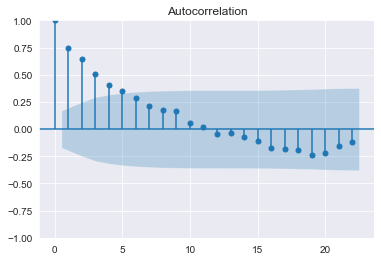

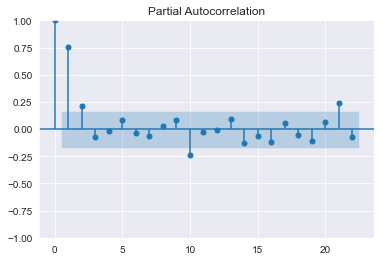

In [36]:
# Seasonality
plot_acf(df['Seasonnalaty'].dropna())
plot_pacf(df['Seasonnalaty'].dropna())
plt.show()

# P value is 2
# Q value is 5